## Sloane's Notebook
### Dataset:
##### Title:
Pittsburgh Police Arrest Data
##### Link: 
https://data.wprdc.org/dataset/arrest-data

The dataset I've selected for analysis is "Pittsburgh Police Arrest Data." This dataset represents the number of police arrests within different neighborhoods across Pittsburgh starting on August 23, 2016 until the current day. It includes over 50,000 arrest data entries provided by the Pittsburgh Bureau of Police. I chose this dataset in particular as arrest rates often correlate to the amount of crime committed within an area, and thus they are good indicators of an area's general level of safety.

I plan to use this dataset to determine the amount of arrests that have occurred within Pittsburgh neighborhoods over the last five years as well as which communities have logged the least amount of criminal arrests. I will then find the arrest rates of each neighborhood by using their arrest amounts as well as their populations. The neighborhoods' arrest rates will then be used to determine the overall level of safety within each area.


### Code:

In [1]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mpl

crimedata = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
crimedata.head(10) # First ten rows of the dataset, test to see if the data loads

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


In [2]:
crimedata['INCIDENTNEIGHBORHOOD'].unique() # This allows me to see which neighborhoods are accounted for in the dataset

array(['Bloomfield', 'Outside City', 'Westwood', 'East Allegheny',
       'Crafton Heights', 'Greenfield', 'Brookline', 'Regent Square',
       'East Liberty', nan, 'East Hills', 'Carrick', 'Allegheny Center',
       'South Side Flats', 'Sheraden', 'East Carnegie',
       'Golden Triangle/Civic Arena', 'Point Breeze North', 'Perry South',
       'Allentown', 'North Shore', 'Marshall-Shadeland',
       'Central Oakland', 'Middle Hill', 'Strip District',
       'Lincoln-Lemington-Belmar', 'Central Northside',
       'Troy Hill-Herrs Island', 'Highland Park', 'Homewood North',
       'Northview Heights', 'Brighton Heights', 'Hazelwood',
       'Perry North', 'Bedford Dwellings', 'Elliott', 'Beechview',
       'Fineview', 'Glen Hazel', 'Spring Hill-City View', 'Bluff',
       'Manchester', 'Homewood West', 'Outside County', 'Point Breeze',
       'Homewood South', 'Squirrel Hill South', 'Terrace Village',
       'Upper Lawrenceville', 'Arlington', 'South Side Slopes',
       'Lower Lawrenc

In [4]:
len(crimedata)
# This displays the total amount of arrest reports logged in the dataset

52014

In [5]:
len(crimedata['INCIDENTNEIGHBORHOOD'].unique()) # This shows the number of neighborhoods represented in the dataset
# I am doing this in order to have a total number of neighborhoods to refer to when constructing my arrest rate sheet

99

In [6]:
crimedata['INCIDENTNEIGHBORHOOD'].value_counts() 
# This shows how many entries were logged for each neighborhood within the dataset
# It shows the five neighborhoods with the most arrest entries and the five with the least

Central Business District    3181
South Side Flats             2698
Carrick                      1853
East Allegheny               1725
Homewood South               1683
                             ... 
Regent Square                  27
Central Northside              23
Mt. Oliver Boro                17
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

In [7]:
query_mask = crimedata['INCIDENTNEIGHBORHOOD'] == "Mt. Oliver Neighborhood"
olivercrime = crimedata[query_mask]
olivercrime['INCIDENTNEIGHBORHOOD'].value_counts() 
# Test to make sure data is accurate
# It does only have 2 entries, so the dataset value count data is accurate.

Mt. Oliver Neighborhood    2
Name: INCIDENTNEIGHBORHOOD, dtype: int64

Text(0, 0.5, 'Arrests (2016-2021)')

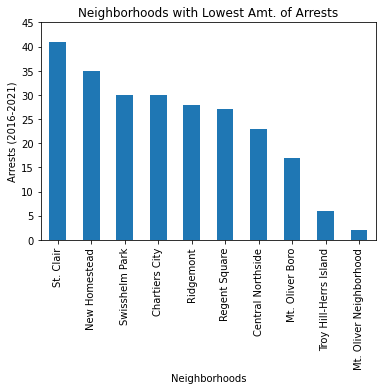

In [8]:
vc = crimedata['INCIDENTNEIGHBORHOOD'].value_counts() 
vc.tail(10).plot(kind="bar", ylim=[0,45])
mpl.title("Neighborhoods with Lowest Amt. of Arrests")
mpl.xlabel("Neighborhoods")
mpl.ylabel("Arrests (2016-2021)")
# This bar graph displays the ten neighborhoods with the lowest reported amounts of arrests

In [103]:
for idx, name in enumerate(crimedata['INCIDENTNEIGHBORHOOD'].value_counts().index.tolist()):
    print('Neighborhood :', name)
    print('Arrests :', crimedata['INCIDENTNEIGHBORHOOD'].value_counts()[idx])

# This will display the number of reported arrests for each neighborhood in Pittsburgh
# I will use this data to construct a new csv file that will allow me to determine the crime rates of each neighborhood based on population

Neighborhood : Central Business District
Arrests : 3181
Neighborhood : South Side Flats
Arrests : 2698
Neighborhood : Carrick
Arrests : 1853
Neighborhood : East Allegheny
Arrests : 1725
Neighborhood : Homewood South
Arrests : 1683
Neighborhood : Homewood North
Arrests : 1552
Neighborhood : East Liberty
Arrests : 1444
Neighborhood : Marshall-Shadeland
Arrests : 1201
Neighborhood : Bluff
Arrests : 1164
Neighborhood : Mount Washington
Arrests : 1127
Neighborhood : Knoxville
Arrests : 1067
Neighborhood : Hazelwood
Arrests : 1065
Neighborhood : Brookline
Arrests : 1038
Neighborhood : Lincoln-Lemington-Belmar
Arrests : 1015
Neighborhood : Sheraden
Arrests : 1013
Neighborhood : Beechview
Arrests : 982
Neighborhood : Allegheny Center
Arrests : 972
Neighborhood : East Hills
Arrests : 905
Neighborhood : Brighton Heights
Arrests : 882
Neighborhood : Perry South
Arrests : 857
Neighborhood : Bloomfield
Arrests : 800
Neighborhood : Shadyside
Arrests : 775
Neighborhood : Allentown
Arrests : 769
Neigh

In [51]:
meancrime = crimedata['INCIDENTNEIGHBORHOOD'].value_counts()
meancrime.mean()
# Here I've determined the mean amount of arrests for Pittsburgh neighborhoods by taking the mean of the dataset's neighborhood entry counts.
# The mean for Pittsburgh neighborhoods is about 509 arrest reports.

510.7857142857143

In [52]:
query_mask = crimedata['INCIDENTNEIGHBORHOOD'] == "Central Oakland"
oaklandcrime = crimedata[query_mask]
oaklandcrime['INCIDENTNEIGHBORHOOD'].value_counts() 
# Small test to see where Central Oakland ranks in terms of crime
# Oakland ranks above average in terms of arrests with 410 reports. 

Central Oakland    411
Name: INCIDENTNEIGHBORHOOD, dtype: int64

In [79]:
popdata = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
popdata.head(10) # First ten rows of the dataset, test to see if the data loads

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411.0,196.000000
1,Allegheny West,2,343.0,96.000000
2,Allentown,3,2558.0,449.773276
3,Arlington,4,1852.0,348.188168
4,Arlington Heights,5,272.0,126.000000
5,Banksville,6,3858.0,581.107563
6,Bedford Dwellings,7,1349.0,180.000000
7,Beechview,8,8078.0,719.658252
8,Beltzhoover,9,1702.0,343.072879
9,Bloomfield,10,8669.0,491.348145


In [64]:
popdata["Estimate; Total"].sum() # This is the total amount of people that lived in Pittsburgh as of 2015
# Test to make sure this dataset accurately represents the total Pittsburgh population

309327.0

In [63]:
popcrime = pd.read_csv("https://raw.githubusercontent.com/sloanemccensky/Group-43-Final-Project/main/populationsforproject.csv")
popcrime.head(10)
# This displays the first 10 rows of an Excel graph I made that shows each neighborhood's number of arrests and estimated population

,Arrests,Population,Rate
0,3181,4060,0.783498
1,2698,6292,0.428798
2,1853,10122,0.183067
3,1725,2095,0.823389
4,1683,2276,0.739455
5,1552,3371,0.460398
6,1444,5869,0.246039
7,1201,6043,0.198742
8,1164,6294,0.184938
9,1127,8743,0.128903


In [65]:
popcrime['Rate'].min()
# This finds the smallest rate from the 'Rate' column
# .002628121, the lowest crime rate, belongs to Troy Hill-Herrs Island.

0.0026281209999999998

In [80]:
popcrime.nsmallest(10, ['Rate'])
# Here I've located the ten neighborhoods with the lowest crime rates
# In order from lowest to highest, they are: Troy Hill-Herrs Island, Mt. Oliver Neighborhood, Central Northside, West End, South Shore, Squirrel Hill North, Golden Triangle, Swisshelm Park, Regent Square, and Mt. Oliver Boro

,Arrests,Population,Rate
96,6,2283,0.002628
97,2,601,0.003328
94,23,2892,0.007953
60,217,17704,0.012257
54,239,16545,0.014445
61,216,11336,0.019054
82,83,4060,0.020443
91,30,1345,0.022305
93,27,1033,0.026137
95,17,598,0.028428


Text(0, 0.5, 'Population')

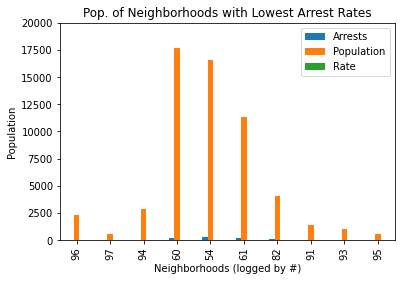

In [102]:
pcr = popcrime.nsmallest(10, ['Rate'])
pcr.plot(kind="bar", ylim=[0,20000])
mpl.title("Pop. of Neighborhoods with Lowest Arrest Rates")
mpl.xlabel("Neighborhoods (logged by #)")
mpl.ylabel("Population")
# This graph displays the diversity of populations represented in my findings

In [ ]:
# When taking population into account, Troy Hill-Herrs Island is the best neighborhood in terms of which neighborhood has the lowest arrest rate.

## Conclusion

Top ten communities with lowest arrest rates based on population (lowest to highest):

1. Troy Hill-Herrs Island
2. Mt. Oliver Neighborhood
3. Central Northside
4. West End
5. South Shore
6. Squirrel Hill North
7. Golden Triangle
8. Swisshelm Park 
9. Regent Square
10. Mt. Oliver Boro

According to my analysis of arrest rates in each Pittsburgh neighborhood, Troy Hill-Herrs Island came out on top with an arrest rate of 
262.8 arrests per 100,000 people. I reached this conclusion by first figuring out the numbers of reported arrests from each neighborhood from my original dataset. Then, using this data along with another WPRDC dataset detailing the 2015 populations of each neighborhood, I created my own Excel sheet in order to find the exact arrest rates of each neighborhood. From there, I concluded that Troy Hill-Herrs Island had the lowest and best arrest rate compared to every other neighborhood analyzed. Even being a Pittsburgh native, I have never visited Troy Hill so this conclusion was somewhat surprising. Some other close contenders were Mt. Olvier Neighborhood, Central Northside, West End, and South Shore.